In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from vinzy_imgdata_importer import img_data_importer

In [3]:
X, y, m = img_data_importer("D:\\Data Science & AI\\DL-CNN-RNN\\DL CNN & RNN\\chest")

Do you want to convert your image data to grey scale? y/n:  y
Do you want to resize your data? y/n [default:100x100]:  y
enter the size:  60


Generating, Shuffling & Mapping the Data...


Do you want to normalize your data? y/n [recommended]:  n
Do you want to save your data? y/n [will be saved using pickle]:  n


In [4]:
m

{'normal': 0, 'pneumonia': 1}

In [5]:
type(y)

list

In [6]:
y = np.array(y)

In [7]:
type(y)

numpy.ndarray

In [8]:
set(y)

{0, 1}

In [9]:
classes = list(m)
classes

['normal', 'pneumonia']

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

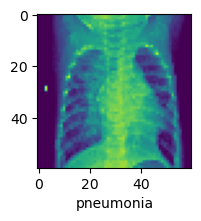

In [11]:
plot_sample(X, y, 0)

In [12]:
X.shape

(5856, 60, 60, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4684, 60, 60, 1), (1172, 60, 60, 1), (4684,), (1172,))

In [16]:
set(y_test)

{0, 1}

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [41]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(60, 60, 1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))

# model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
X_train = X_train / 255
X_test = X_test / 255

In [35]:
# logdir = "logs"
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2) # callbacks=[tensorboard_callback]

Epoch 1/10
118/118 [==============================] - 19s 149ms/step - loss: 0.5986 - accuracy: 0.7206 - val_loss: 0.6038 - val_accuracy: 0.7524
Epoch 2/10
118/118 [==============================] - 18s 150ms/step - loss: 0.5945 - accuracy: 0.7227 - val_loss: 0.5729 - val_accuracy: 0.7524
Epoch 3/10
118/118 [==============================] - 17s 146ms/step - loss: 0.5926 - accuracy: 0.7227 - val_loss: 0.5600 - val_accuracy: 0.7524
Epoch 4/10
118/118 [==============================] - 19s 160ms/step - loss: 0.5932 - accuracy: 0.7227 - val_loss: 0.5613 - val_accuracy: 0.7524
Epoch 5/10
118/118 [==============================] - 18s 155ms/step - loss: 0.5926 - accuracy: 0.7227 - val_loss: 0.5648 - val_accuracy: 0.7524
Epoch 6/10
118/118 [==============================] - 19s 160ms/step - loss: 0.5939 - accuracy: 0.7227 - val_loss: 0.5641 - val_accuracy: 0.7524
Epoch 7/10
118/118 [==============================] - 18s 152ms/step - loss: 0.5923 - accuracy: 0.7227 - val_loss: 0.5674 - val_ac

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 32)        

In [46]:
loss, acc = model.evaluate(X_test, y_test)

37/37 [==============================] - 1s 35ms/step - loss: 0.5801 - accuracy: 0.7338


In [47]:
print(f"loss:{loss}")
print(f"acc:{acc}")

loss:0.5801224708557129
acc:0.7337883710861206


In [48]:
y_pred = model.predict(X_test)

37/37 [==============================] - 1s 35ms/step


In [49]:
y_classes = [np.argmax(element) for element in y_pred]
set(y_classes)

{1}

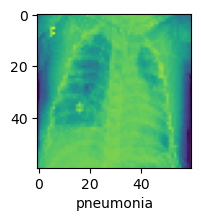

In [50]:
plot_sample(X_test, y_classes, 0)

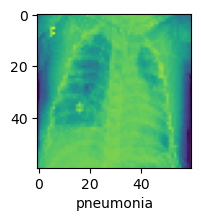

In [51]:
plot_sample(X_test, y_test, 0)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
print(classification_report(y_test, y_classes))

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.73      1.00      0.85       860

    accuracy                           0.73      1172
   macro avg       0.37      0.50      0.42      1172
weighted avg       0.54      0.73      0.62      1172



C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


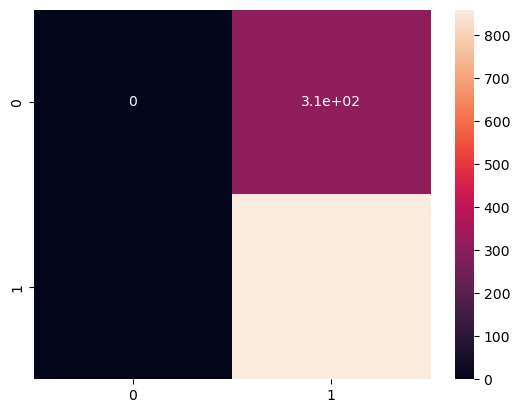

In [54]:
cn = confusion_matrix(y_test, y_classes)
sns.heatmap(cn, annot=True);

In [55]:
model.save("tf_chest_xray")

INFO:tensorflow:Assets written to: tf_chest_xray\assets


INFO:tensorflow:Assets written to: tf_chest_xray\assets
